In [9]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../src")
from convolutional_VAE import ConVae


In [2]:
input_dim = (128, 128, 1)
n_layers = 2
filter_architecture = [50, 40]
kernel_architecture = [7, 5]
strides_architecture = [4, 2]

latent_dim = 3
batch_size = 50 

X = np.load("../data/processed/train.npy")

cvae = ConVae(
        input_dim,
        n_layers,
        filter_architecture,
        kernel_architecture,
        strides_architecture, 
        latent_dim,
        batch_size, 
        X
        )

cvae.CompileModel()
cvae.CompileLoss()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
encoder (Model)              [(None, 3), (None, 3), (N 837246    
_________________________________________________________________
decoder (Model)              (None, 16384)             169651    
Total params: 1,006,897
Trainable params: 1,006,897
Non-trainable params: 0
_________________________________________________________________


0

In [3]:
cvae.restore("../models/conVAE/")


loaded enc
loaded dec
loaded vae


In [4]:
test_batch = X[0:50]

In [5]:
test_batch.shape

(50, 128, 128, 1)

In [6]:
predicted = cvae.vae.predict_on_batch(test_batch)

In [7]:
predicted.shape

(50, 16384)

In [8]:
output_img = predicted.reshape((50, 128, 128))

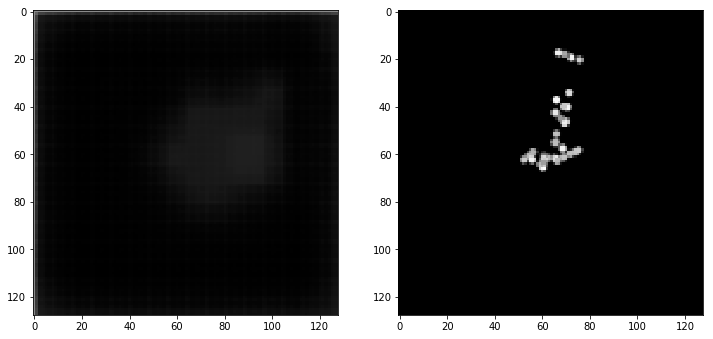

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 10))

which = 0
ax[0].imshow(output_img[which], vmax=1, vmin=0, cmap="Greys_r")
ax[1].imshow(X[which].reshape((128, 128)), vmax=1, vmin=0,  cmap="Greys_r")